# Network Notes

In [1648]:
# good 160 unit *3 network
network_model = "func-21-4-1"
iter1 = 1480
iter2 = 1490
codec = 3200
model_type = 'functional'
'''
network_model = "tale-prog-large3dense5"
iter1 = 5
iter2 = 50

network_model = "tale-prog-large3dense6"
iter1 = 5
iter2 = 30

network_model = "tale-prog-large3alt1"
iter1 = 5 #good
iter2 = 110

network_model = "tale-prog-quick2"
iter1 = 55
iter2 = 340
'''
# full set of 320 unit *3 network
#network_model = "tale-prog-stateful8l"
#iter1 = 500
#iter2 = 505

#network_model = "tale-prog-lg123alt"
#iter1 = 5
#iter2 = 55

from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



Generated multiple frames in one action: 1 
Generated multiple frames in one action: 1 
Generated multiple frames in one action: 1 
Generated multiple frames in one action: 1 
wrote frames:  200 
saving config 
Training Iteration 1511 
using full set of frames 
Training Iteration 1512 
using full set of frames 
Training Iteration 1513 
using full set of frames 

46700/48451 [===========================>..] - ETA: 17s - loss: 40.4712 - main_output_loss: 34.6065 - mid_output_loss: 29.3231'


In [1649]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


start_iteration :  1510
num_iterations :  2400
fit_batch_size :  100
learn_next_step :  True
gen_every_nth :  10
save_model_every_nth :  10
framelen :  13
frame_seq_len :  100
seed_seq_len :  100
seq_step :  100
test_data_fn :  ./test/criticalpracticalreason.c2-3200
frame_prop_orig_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
frame_prop_loss_scale :  [1000.0, 1000.0, 1000.0, 700.0, 600.0, 500.0, 400.0, 300.0, 200.0, 100.0, 60.0, 31.0, 16.0]
stateful :  False
shuffle :  False
limit_frames :  0
optimizer :  {'name': 'Nadam', 'params': {}}
generate_len :  200
model_filename :  out/func-21-4-1/model-1510.h5
frame_len_ms :  20


In [1650]:
try:
  with open(home + "/store/c2gen/out/" + network_model + '/notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

# func-21-4-1 Notes

2017-11-25 18:31:24

Run with arguments ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200 none

## Description

Replace Conv with Dense

More data


In [1651]:
if model_type != 'functional':
  nd.model_config(network_model)

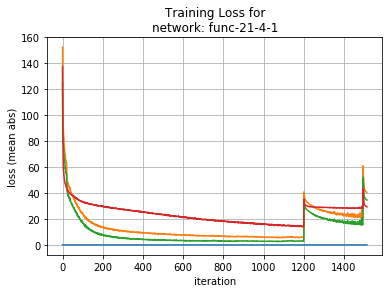

In [1652]:
nd.plot_training_loss(network_model, 'mean abs') 

In [1653]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    print(str.join("",f.readlines()[-10:]))

with open(home + "/store/c2gen/out/"+network_model+"/iteration_counter") as f:
    latest_iter = (int(f.readlines()[0]))
    print(latest_iter)
    

0,42.0651250499,35.9945899111,30.3526752416
0,41.5761861119,35.5650514913,30.0556726553
0,41.3536399883,35.370388584,29.9162565759
0,41.1553239439,35.1971080823,29.7910788637
0,40.9932666004,35.0549198021,29.691733549
0,40.8359280676,34.9104134114,29.6275728396
0,40.7014828658,34.7957871336,29.528478221
0,40.6363010894,34.7454231578,29.4543892194
0,40.4985198654,34.6246973643,29.3691120678
0,40.4427462094,34.5790895409,29.3182829058

1510


Latest Iteration: 1510
3200 rate codec



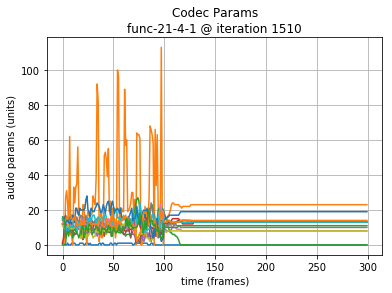

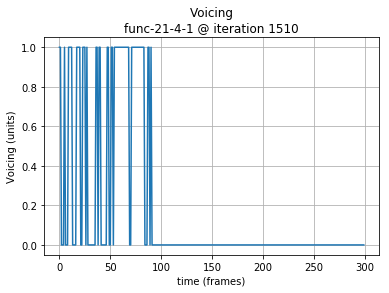

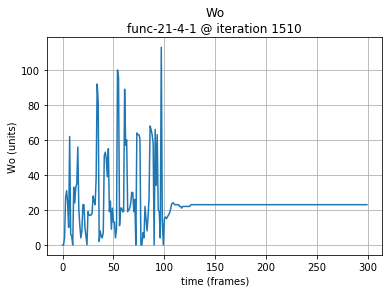

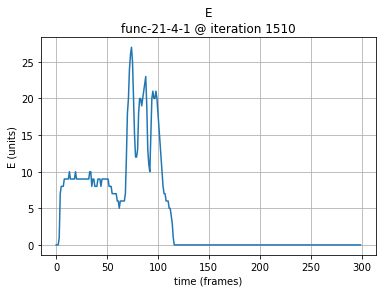

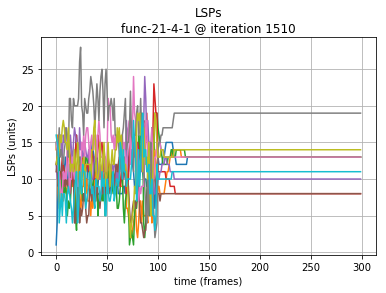

In [1654]:
try:
  print("Latest Iteration:", latest_iter)
  nd.plot_codec_params(network_model,latest_iter, scale_up='orig')
  nd.plot_spec_params(network_model,latest_iter, params='Voicing')
  nd.plot_spec_params(network_model,latest_iter, params='Wo')
  nd.plot_spec_params(network_model,latest_iter, params='E')
  nd.plot_spec_params(network_model,latest_iter, params='LSPs')
except FileNotFoundError:
    print("File not found")

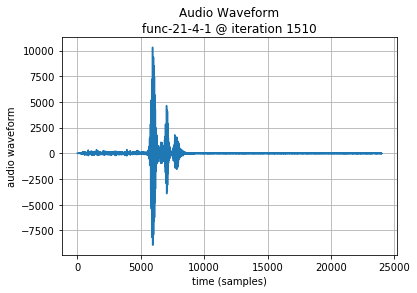

In [1655]:
#print(latest_iter)
#print(home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)+codec_sub+".wav")
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)
#print(home + "/store/c2gen/c2towav.sh", cb)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, latest_iter)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

Early Iterations
===

3200 rate codec



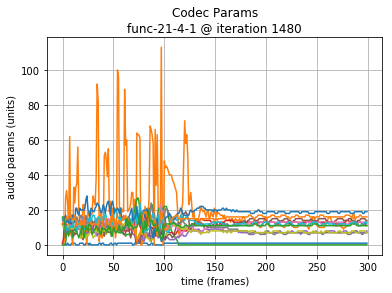

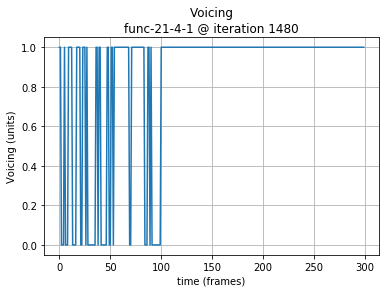

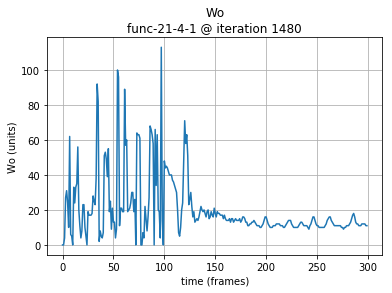

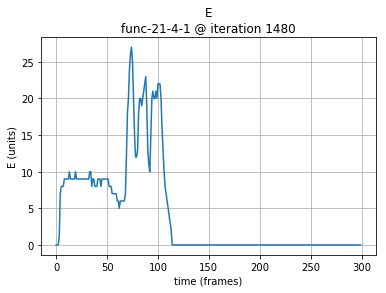

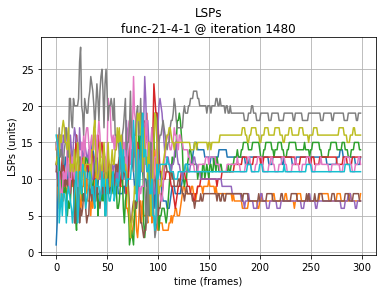

In [1656]:
nd.plot_codec_params(network_model,iter1, scale_up='orig')
nd.plot_spec_params(network_model,iter1, params='Voicing')
nd.plot_spec_params(network_model,iter1, params='Wo')
nd.plot_spec_params(network_model,iter1, params='E')
nd.plot_spec_params(network_model,iter1, params='LSPs')

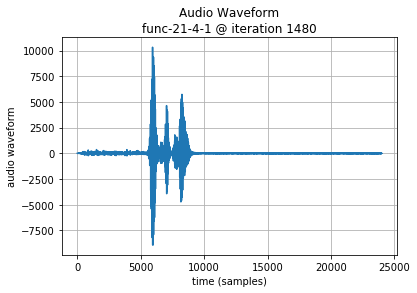

In [1657]:
nd.plot_audio_waveform(network_model, iter1)

Listen to the WAV file

In [1658]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)+codec_sub+".wav"))

Later Iterations
===

3200 rate codec



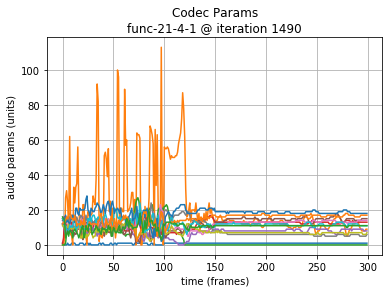

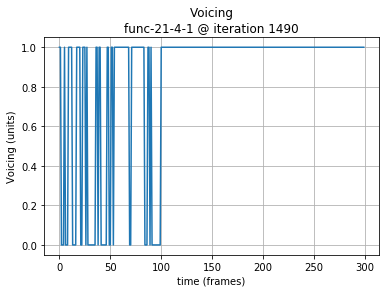

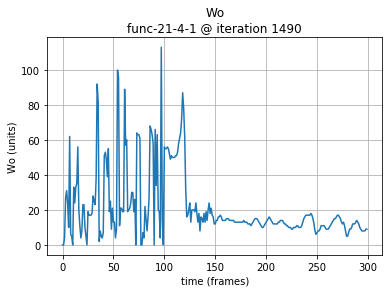

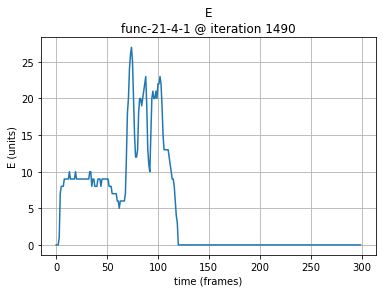

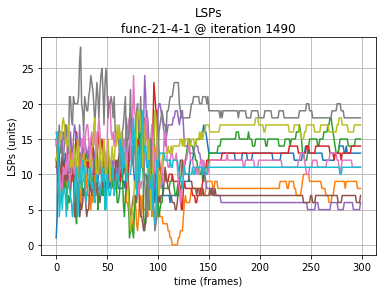

In [1659]:
nd.plot_codec_params(network_model,iter2, scale_up=True)
nd.plot_spec_params(network_model,iter2, params='Voicing')
nd.plot_spec_params(network_model,iter2, params='Wo')
nd.plot_spec_params(network_model,iter2, params='E')
nd.plot_spec_params(network_model,iter2, params='LSPs')

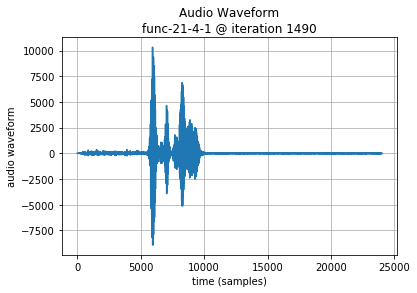

In [1660]:
nd.plot_audio_waveform(network_model, iter2)

Listen to the WAV file

In [1661]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)+codec_sub+".wav"))